In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.applications import VGG16
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
root_dir = '../datasets/mnist-alphanumeric-images/'
X, y = [], []
for root, dirs, files in os.walk(root_dir):
    if len(files) == 0:
        continue

    output = [0] * 36
    character = root.split('/')[-1]
    if character.isnumeric():
        output[int(character)] = 1
    else:
        output[ord(character) - 55] = 1
    
    for image_filename in tqdm(os.listdir(root)):
        image_filepath = os.path.join(root, image_filename)
        image = Image.open(image_filepath)
        image = ImageOps.grayscale(image)
        image = np.array(image)
        output = np.array(output)

        X.append(image)
        y.append(output)

100%|██████████| 4800/4800 [00:02<00:00, 1871.26it/s]


In [3]:
X = np.array(X).reshape(-1, 28, 28, 1) / 255.0
y = np.array(y)

print(X.shape)
print(y.shape)

(172800, 28, 28, 1)
(172800, 36)


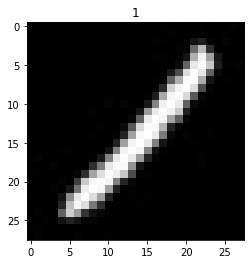

In [7]:
index = 4800
img = X[index].reshape(28, 28)
label_index = np.argmax(y[index])
plt.title(label_index)
plt.imshow(img, cmap='gray')

In [8]:
model = Sequential(name='letter_classifier')

model.add(Conv2D( filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D( filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D( filters=256, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=36, activation='softmax'))


In [9]:
model.summary()

Model: "letter_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)   

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=40, validation_split=0.2, shuffle=True)

Epoch 1/40
486/486 [==============================] - 62s 125ms/step - loss: 2.2445 - accuracy: 0.3622 - val_loss: 0.7816 - val_accuracy: 0.7425
Epoch 2/40
486/486 [==============================] - 60s 123ms/step - loss: 0.8657 - accuracy: 0.7111 - val_loss: 0.6046 - val_accuracy: 0.7948
Epoch 3/40
486/486 [==============================] - 61s 125ms/step - loss: 0.6978 - accuracy: 0.7605 - val_loss: 0.5331 - val_accuracy: 0.8171
Epoch 4/40
486/486 [==============================] - 60s 123ms/step - loss: 0.6204 - accuracy: 0.7861 - val_loss: 0.4970 - val_accuracy: 0.8247
Epoch 5/40
486/486 [==============================] - 60s 123ms/step - loss: 0.5769 - accuracy: 0.7996 - val_loss: 0.4549 - val_accuracy: 0.8409
Epoch 6/40
486/486 [==============================] - 56s 116ms/step - loss: 0.5457 - accuracy: 0.8089 - val_loss: 0.4480 - val_accuracy: 0.8441
Epoch 7/40
486/486 [==============================] - 56s 116ms/step - loss: 0.5205 - accuracy: 0.8160 - val_loss: 0.4258 - val_ac

In [13]:
model.save("../weights/character_classifier")

INFO:tensorflow:Assets written to: ../weights/character_classifier\assets
